# Nettoyage du jeu de données "Open Food Facts"
Le jeu de données est téléchargeable sur le site Open Food Facts : https://world.openfoodfacts.org/data . Il existe différentes manières de le télécharger, nous avons choisi de faire un import au format csv. 
Nous remarquons lors du téléchargement que le jeu de données est assez important (environ 4Gb).

In [43]:
# Importations des librairies 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
%matplotlib inline


# Partie1: Chargement le jeu de données

In [2]:
'''# nombre de lignes à charger en même temps en mémoire
chunksize = 10 ** 4
filename = 'en.openfoodfacts.org.products.csv'
nan_rates = []
for chunk in pd.read_csv(filename, chunksize=chunksize, sep='\t'):
    nan_rates.append(chunk.isna().mean(axis=0))
# moyenne des taux de remplissage des chunks
inds_nan_rate = pd.concat(nan_rates, axis=1).mean(axis=1)
cols_to_load = inds_nan_rate[inds_nan_rate < 0.7].index.tolist()
df = pd.read_csv(filename, sep='\t', usecols=cols_to_load)
'''

"# nombre de lignes à charger en même temps en mémoire\nchunksize = 10 ** 4\nfilename = 'en.openfoodfacts.org.products.csv'\nnan_rates = []\nfor chunk in pd.read_csv(filename, chunksize=chunksize, sep='\t'):\n    nan_rates.append(chunk.isna().mean(axis=0))\n# moyenne des taux de remplissage des chunks\ninds_nan_rate = pd.concat(nan_rates, axis=1).mean(axis=1)\ncols_to_load = inds_nan_rate[inds_nan_rate < 0.7].index.tolist()\ndf = pd.read_csv(filename, sep='\t', usecols=cols_to_load)\n"

In [3]:
# importation du jeu de données
filename = "en.openfoodfacts.org.products.csv"
df = pd.read_csv(filename, decimal = ',', sep='\t', low_memory=False)

# Partie2: Qualité des données




On vérifie la taile de dataframe.
Combien de lignes et colonnes sont contenues dans df ?

In [4]:
# Taille de dataframe
df.shape

(2191222, 191)

Vérifier le taux de remplissage de chacun des indicateurs

In [5]:
# Affichage du pourcentage de donneés manquantes
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

code                   0.000000
url                    0.000000
creator                0.000183
created_t              0.000000
created_datetime       0.000000
                        ...    
choline_100g          99.996623
phylloquinone_100g    99.921870
beta-glucan_100g      99.998220
inositol_100g         99.996486
carnitine_100g        99.997992
Length: 191, dtype: float64

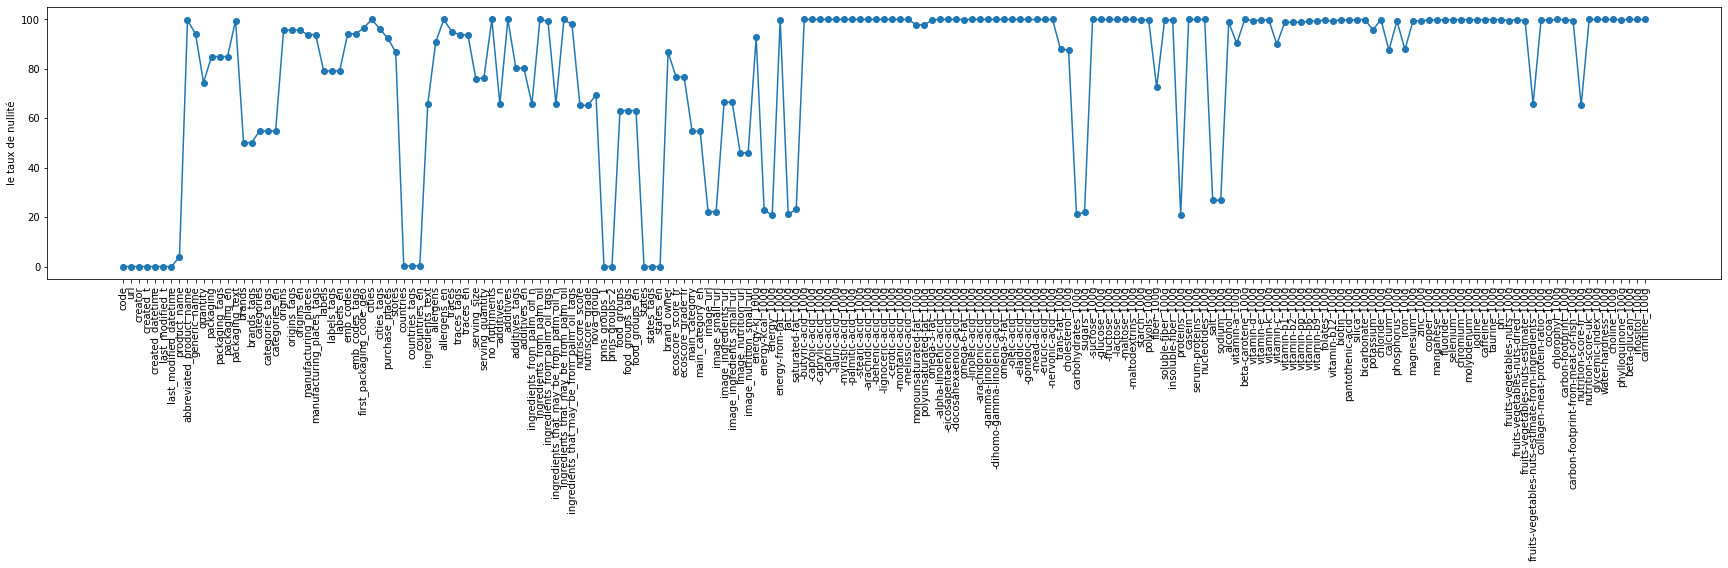

In [7]:
plt.figure(figsize=(30, 5))
plt.ylabel('le taux de nullité')
plt.xticks(rotation = '90')
plt.plot(percent_missing, 'o-')

In [8]:
# mesure la corrélation de nullité 
#msno.bar(df.sample(1000))

## I. Traitement des valeurs manquantes
On voit qu'il y a beaucoup des valeurs manquantes donc on va supprimer des colonnes avec plus 75% de valeurs manquantes

In [9]:
# suppression des colonnes avec plus de 75% de valeurs manquantes
df = df.loc[:, df.isnull().mean() <.75]

In [10]:
df.shape

(2191222, 52)

la taille de df a dimimué de 50 colonnes à 24 colonnes, maintenant on doit choisir les colonnes pertinences

## II. Choisir les indicateurs pertinence
Vérifier la pertinence des variables retenues.

In [14]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'brands', 'brands_tags', 'categories', 'categories_tags',
       'categories_en', 'countries', 'countries_tags', 'countries_en',
       'ingredients_text', 'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'food_groups', 'food_groups_tags', 'food_groups_en', 'states',
       'states_tags', 'states_en', 'main_category', 'main_category_en',
       'image_url', 'image_small_url', 'image_ingredients_url',
       'image_ingredients_small_url', 'image_nutrition_url',
       'image_nutrition_small_url', 'energy-kcal_100g', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'fruits-veg

 On supprime les colonnes pas nécessaire les urls, les infos liées à la création de la fiche article, redondance brand('url', 'image_url', 'image_small_url', 'image_ingredients_url',
       'image_ingredients_small_url', 'image_nutrition_url',
       'image_nutrition_small_url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime')

In [99]:
cols_to_keep = ['code',  'product_name', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'countries', 'countries_tags', 'countries_en', 'ingredients_text',
       'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'food_groups', 'food_groups_tags', 'food_groups_en', 'states',
       'states_tags', 'states_en', 'main_category', 'main_category_en','energy-kcal_100g', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'nutrition-score-fr_100g']

on va que charger les colonnes pertinences  

In [100]:
df = pd.read_csv(filename, sep='\t', usecols=cols_to_keep)

In [101]:
df.shape

(2191222, 38)

<AxesSubplot:>

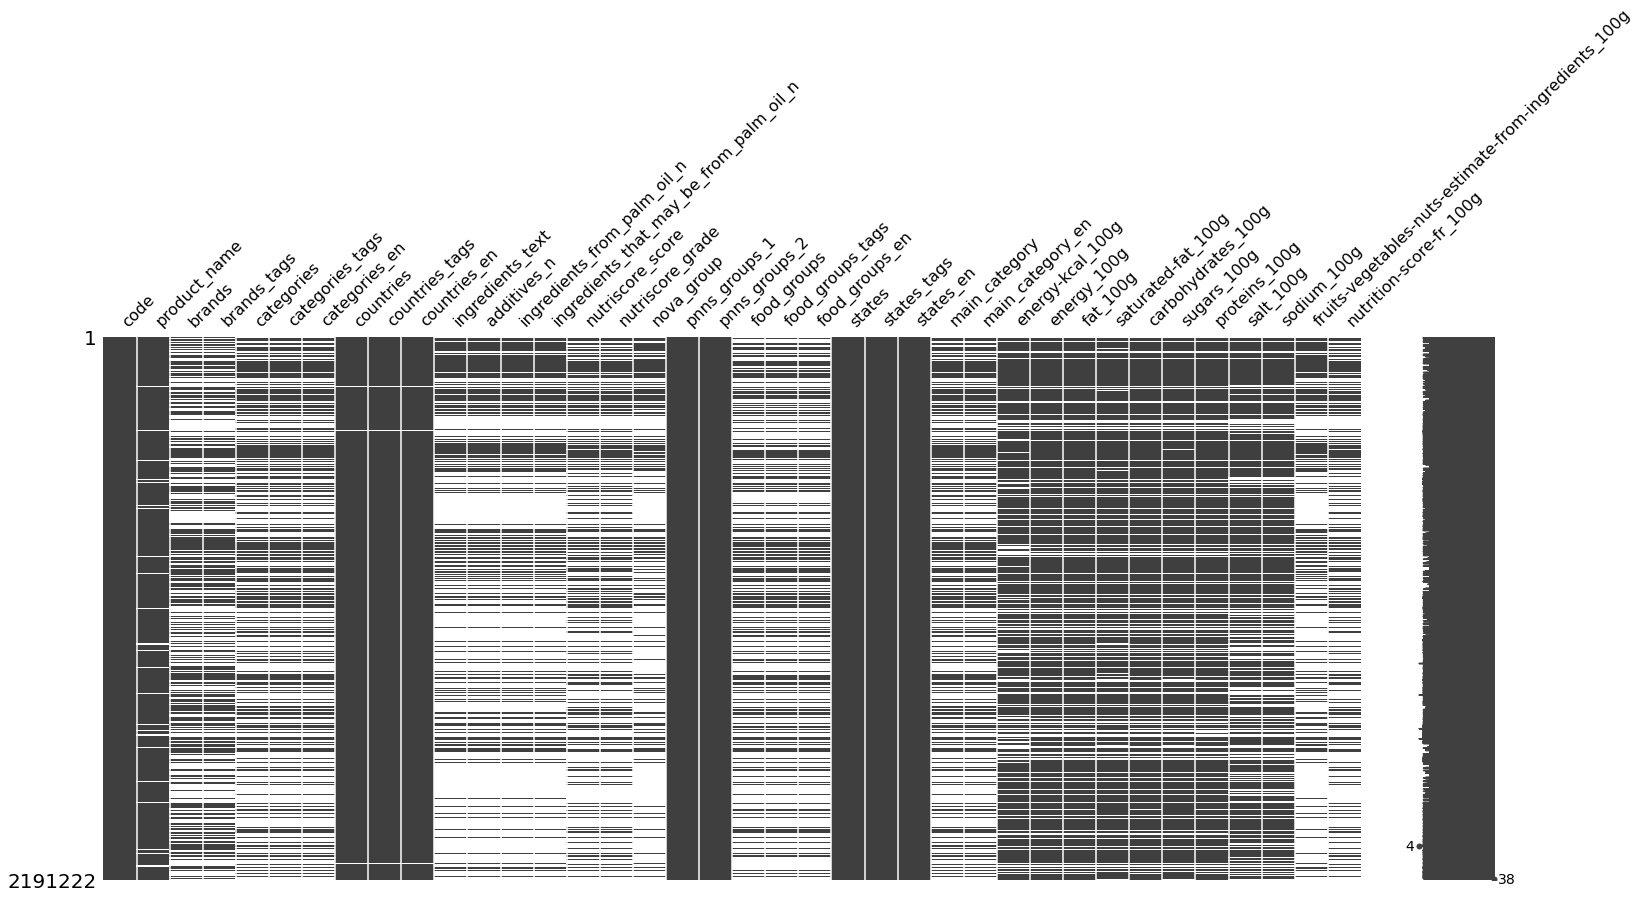

In [102]:
#%matplotlib inline
msno.matrix(df)

## III. Suppression des colonnes redondantes
On supprime les colonnes redondantes avec un suffixe et aussi celle contenant les urls des images des produits ainsi que les stamps de datetime


In [103]:
df[['brands', 'brands_tags']].isna().mean(axis=0)


brands         0.501407
brands_tags    0.501442
dtype: float64

In [104]:
df[['categories', 'categories_tags', 'categories_en']].isna().mean(axis=0)


categories         0.548422
categories_tags    0.548427
categories_en      0.548427
dtype: float64

In [105]:
df[['countries', 'countries_tags', 'countries_en']].isna().mean(axis=0)
#df[['countries', 'countries_tags', 'countries_en']]['countries_en'].value_counts()

countries         0.002909
countries_tags    0.002912
countries_en      0.002912
dtype: float64

In [106]:
df[['states','states_tags', 'states_en']].isna().mean(axis=0)
#df[['states','states_tags', 'states_en']]['states_en']

states         0.0
states_tags    0.0
states_en      0.0
dtype: float64

In [107]:
df[['main_category', 'main_category_en']].isna().mean(axis=0)
#df[['main_category', 'main_category_en']]['main_category_en'].value_counts()

main_category       0.548427
main_category_en    0.548427
dtype: float64

In [108]:
df[['food_groups', 'food_groups_tags', 'food_groups_en']].isna().mean(axis=0)
#df[['food_groups', 'food_groups_tags', 'food_groups_en']]['food_groups_en'].value_counts()

food_groups         0.631061
food_groups_tags    0.631061
food_groups_en      0.631061
dtype: float64

In [109]:
df[['energy-kcal_100g', 'energy_100g']].isna().mean(axis=0)
#df[['energy-kcal_100g', 'energy_100g']]['energy-kcal_100g']..value_counts()

energy-kcal_100g    0.229671
energy_100g         0.206992
dtype: float64

In [110]:
df['ingredients_text'].unique()

array([nan,
       'Leche semidesnatada, azucar 6.9% leche desnatada en polva, fermentos lacticos (contiene Lactobacidus casei), vitaminas (B6 y D).',
       "beta alanine, creatine hcl, ancient peat & apple extract (as elevatp), l-leucine, l-isoleucine, l-valine, betaine anhydrous, arginine silicate inositol (as nitrosigine), cordyceps militaris (cordyceps), ganoderma lucidum (reishi), pleurotus eryngii (king trumpet), lentinula edodes (shitake), hericium erinaceus (lion's mane), and trametes veriscolor (turkey tail) (as peako2), phyllanthus emblica (fruit) extract (as capros), nattokinase (as nsk-sd40), 1000 fu (fibronolytic units) of enzyme activity, aframomum melegueta (seed) (6-paradol 12%) (as caloriburn gp), caffeine anhydrous, methyliberine (as dynamine 40%), theacrine (as teacrine 40%), citric acid, natural & artificial flavors, malic acid, soluble corn fiber, sucralose, acesulfame potassium, calcium silicate, silicon dioxide, fd&c blue lake #1",
       ...,
       'FORMULA: C

Cette colonne "ingredients_text" a compris des textes en les languages différents donc on la garde pas

In [111]:
df[['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']].isna().mean(axis=0)

ingredients_from_palm_oil_n                0.658168
ingredients_that_may_be_from_palm_oil_n    0.658168
dtype: float64

In [112]:
df['ingredients_that_may_be_from_palm_oil_n'].unique()

array([nan,  0.,  3.,  1.,  2.,  4.,  5.,  6.])

Puisque le taux de remplissage des colonnes est pareil donc on garde le valeur avec plus variété.

In [113]:
# Supprimer les colonnes supplèmentaire 
cols_to_remove = ['brands_tags', 'categories_tags', 'categories_en', 'countries', 'countries_tags', 'ingredients_text', 'states','states_tags', 'states_en', 'main_category', 'food_groups', 'food_groups_tags', 'energy_100g', 'ingredients_from_palm_oil_n']
df = df.drop(cols_to_remove, axis=1)
df.shape

(2191222, 24)

Ce traitement nous a permis d'enlever 28 colonnes

## IV. Suppression des entrées multiples

In [114]:
# Détecter duplivatas
df.duplicated('code').sum()

242

On remarque qu'il y a 242 entrée dupliquée, on va maintenant nous débarrasser des duplicatas en supprimant la version la moins bien renseignée

In [115]:

# on compte le nombre de valeurs manquantes pour la ligne et on stocke dans une nouvelle colonne
df['NB_NAN'] = df.isna().sum(axis=1)
# trie des lignes en fonction du nombre de valeurs manquantes
df = df.sort_values('NB_NAN')
# suppression des duplicatas en gardant les versions les mieux remplies
df = df.drop_duplicates('code', keep='first')
# on supprime la colonne qui n'est plus utile
df = df.drop('NB_NAN', axis=1)

df.shape

(2190980, 24)

Ce traitement nous aide d'enlever 242 les entrées multiples

## V. Modification des types

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190980 entries, 1095610 to 1620857
Data columns (total 24 columns):
 #   Column                                                 Dtype  
---  ------                                                 -----  
 0   code                                                   object 
 1   product_name                                           object 
 2   brands                                                 object 
 3   categories                                             object 
 4   countries_en                                           object 
 5   additives_n                                            float64
 6   ingredients_that_may_be_from_palm_oil_n                float64
 7   nutriscore_score                                       float64
 8   nutriscore_grade                                       object 
 9   nova_group                                             float64
 10  pnns_groups_1                                          objec

On voit que certaines des colonnes ont des valeurs Nan et float on va modifier tous les valeurs en float par example le type de valeurs "energy_100g " est object donc on va modifier les valeurs des colonnes en float.

In [117]:
# modification des types du dataset en float quand cela est nécessaire
col_name = ["energy-kcal_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "sugars_100g", "proteins_100g", "salt_100g", "sodium_100g", "fruits-vegetables-nuts-estimate-from-ingredients_100g", "nutrition-score-fr_100g"]

for col in col_name:
    df[col] = pd.to_numeric(df[col])

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190980 entries, 1095610 to 1620857
Data columns (total 24 columns):
 #   Column                                                 Dtype  
---  ------                                                 -----  
 0   code                                                   object 
 1   product_name                                           object 
 2   brands                                                 object 
 3   categories                                             object 
 4   countries_en                                           object 
 5   additives_n                                            float64
 6   ingredients_that_may_be_from_palm_oil_n                float64
 7   nutriscore_score                                       float64
 8   nutriscore_grade                                       object 
 9   nova_group                                             float64
 10  pnns_groups_1                                          objec

## VI: Détections des anomalies des variables quantitatives

In [119]:
df.describe()

,additives_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
count,748962.000000,748962.000000,761753.000000,667623.000000,1.687799e+06,1.728482e+06,1.682057e+06,1.728077e+06,1.709008e+06,1.729875e+06,1.603139e+06,1.603136e+06,747598.000000,761759.000000
mean,2.022112,0.069612,9.100346,3.397121,6.451181e+07,5.786111e+11,5.941675e+04,5.785811e+04,5.857197e+07,5.778179e+04,6.233852e+04,2.493546e+04,8.584497,9.100408
std,2.889234,0.302846,8.848132,0.985800,7.726363e+10,7.606197e+14,7.705262e+07,7.601971e+07,7.649414e+10,7.598019e+07,7.892637e+07,3.157058e+07,36.183774,8.848137
min,0.000000,0.000000,-15.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-5.000000e+02,0.000000e+00,0.000000e+00,0.000000,-15.000000
25%,0.000000,0.000000,1.000000,3.000000,1.000000e+02,8.000000e-01,1.000000e-01,3.500000e+00,6.000000e-01,1.300000e+00,8.000000e-02,3.200000e-02,0.000000,1.000000
50%,1.000000,0.000000,10.000000,4.000000,2.600000e+02,7.000000e+00,1.800000e+00,1.530000e+01,3.570000e+00,6.000000e+00,5.825000e-01,2.330000e-01,0.000000,10.000000
75%,3.000000,0.000000,16.000000,4.000000,4.000000e+02,2.121000e+01,7.054700e+00,5.300000e+01,1.731000e+01,1.250000e+01,1.400000e+00,5.600000e-01,0.500000,16.000000
max,49.000000,6.000000,40.000000,4.000000,1.000000e+14,1.000000e+18,9.993273e+10,9.993273e+10,1.000000e+14,9.993273e+10,9.993273e+10,3.997309e+10,13461.000000,40.000000


Les données nutritives étant pour 100g et les valeurs ne peuvent pas dépasser des seuils mais On voit que certains aliments ont la calories plus 900kcal et inférieures à 0 

on va visualiser des anomalies à l'aide de boîtes à moustaches

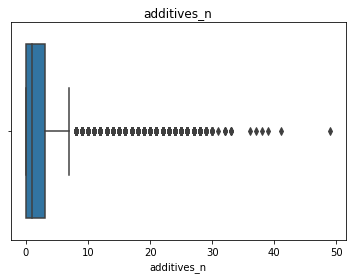

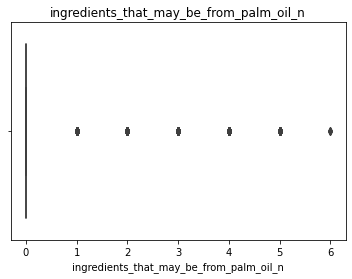

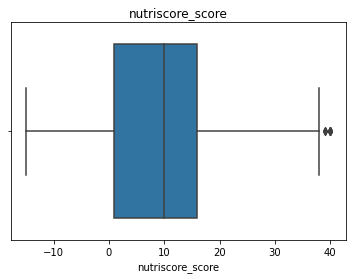

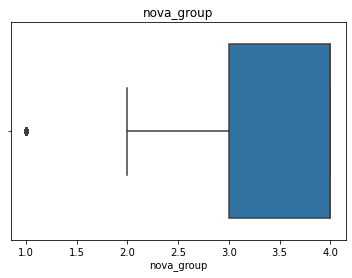

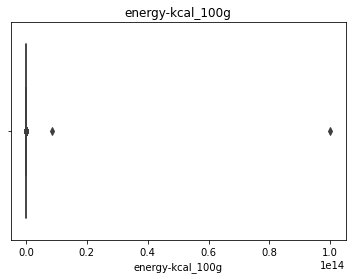

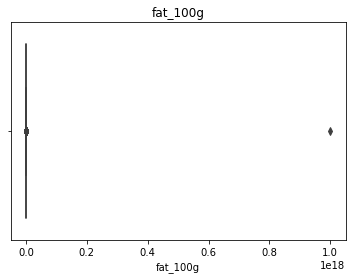

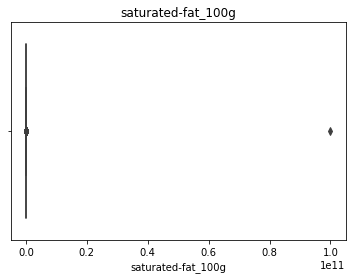

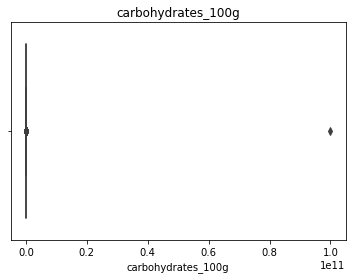

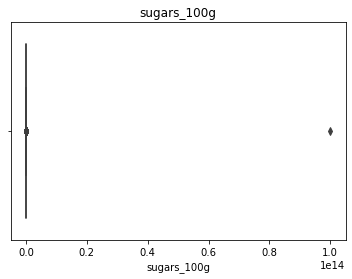

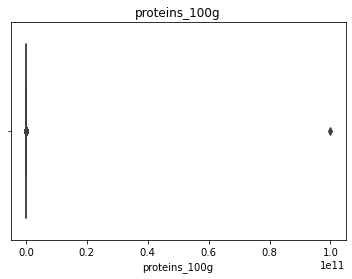

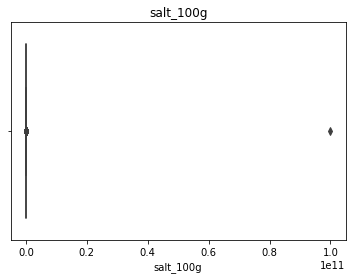

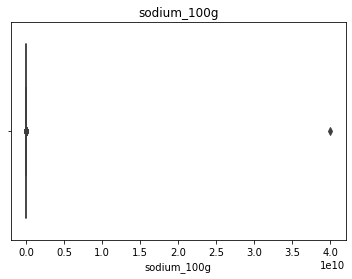

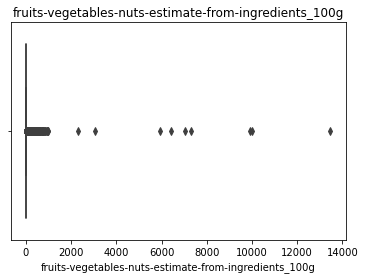

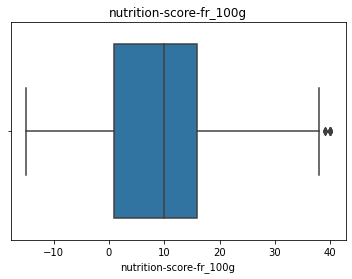

In [120]:
# Création des boîtes à moustache pour détecter les anomalies 
for col_value in df.columns:
    if df[col_value].dtypes == 'float64':
        sns.boxplot(x=col_value, data=df)
        plt.title(col_value)
        plt.show()

# Partie 3: Traitement des valeurs  (anomalies_corrélants_manquantes)

## I.Traitement des outliers

 On supprime les valeurs inférieure à 0 et supérieures à 900 kcal en ce qui concerne l'énergie en kcal

In [121]:
df.shape

(2190980, 24)

In [122]:
df2= df.copy()

# Supprimer des outliers "energy-kcal_100g"
cols = ["energy-kcal_100g"]
for col in cols : 
    line = df2.loc[(df2[col] < 0) | (df2[col] > 900)].index.to_list()
    df2.drop(index=line, inplace=True)

df2.shape

(2184321, 24)

Ce premier traitement a permis d'enlever 6659 entrées.
On va supprimer les valeurs superieures à 100g et inférieure à 0 pour les valeurs 100g. 

In [123]:
# Supprimer des outliers les valeurs pour 100g
cols = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',  'proteins_100g', 'salt_100g', 'sodium_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'nutrition-score-fr_100g']

for col in cols : 
    line = df2.loc[(df2[col] < 0) | (df2[col] > 100)].index.to_list()
    df2.drop(index=line, inplace=True)

df2.shape


(2062179, 24)

le deuxième traitement a permis d'enlever 122142 entrées

On sait que dans un 100g d'un aliments il ne faut pas avoir le contenu total dépasser 100g donc on calcule le total des ingrédiets. 

In [124]:
df2['sum_ingredients'] = df2[['fat_100g','carbohydrates_100g', 'sugars_100g', 'salt_100g', 'proteins_100g']].sum(axis=1)

line = df2.loc[(df2['sum_ingredients'] > 100)].index.to_list()
df2.drop(index=line, inplace=True)
    
df2.shape



(1688990, 25)

le troisième traitement a permis d'enlever 373189 lignes 

In [125]:
'''# Création des boîtes à moustache pour vérification de traitement les anomalies 
for col_value in df2.columns:
    if df2[col_value].dtypes == 'float64':
        sns.boxplot(x=col_value, data=df2)
        plt.title(col_value)
        plt.show()
''' 

"# Création des boîtes à moustache pour vérification de traitement les anomalies \nfor col_value in df2.columns:\n    if df2[col_value].dtypes == 'float64':\n        sns.boxplot(x=col_value, data=df2)\n        plt.title(col_value)\n        plt.show()\n"

In [126]:
#ind_nutris = ['energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'nutrition-score-fr_100g']


In [127]:
'''for ind in ind_nutris:
    if ind == 'energy-kcal_100g':
        filter = df[ind].isna() | ((df[ind] > 0) & (df[ind] <= 900))
    elif ind == 'nutrition-score-fr_100g':
        filter = df[ind].isna() | ((df[ind] > -15) & (df[ind] <= 40))
    else:
        filter = df[ind].isna() | ((df[ind] > 0) & (df[ind] <= 100))
    df = df[filter]

'''

"for ind in ind_nutris:\n    if ind == 'energy-kcal_100g':\n        filter = df[ind].isna() | ((df[ind] > 0) & (df[ind] <= 900))\n    elif ind == 'nutrition-score-fr_100g':\n        filter = df[ind].isna() | ((df[ind] > -15) & (df[ind] <= 40))\n    else:\n        filter = df[ind].isna() | ((df[ind] > 0) & (df[ind] <= 100))\n    df = df[filter]\n\n"

In [128]:
'''filtre_sum = (df[['fat_100g', 'sugars_100g', 'proteins_100g', 'salt_100g']].isna().any(axis=1)) | ((df['fat_100g'] + df['sugars_100g']+ df['proteins_100g']+ df['salt_100g']) > 100)
df =df[filtre_sum]
'''
                                

"filtre_sum = (df[['fat_100g', 'sugars_100g', 'proteins_100g', 'salt_100g']].isna().any(axis=1)) | ((df['fat_100g'] + df['sugars_100g']+ df['proteins_100g']+ df['salt_100g']) > 100)\ndf =df[filtre_sum]\n"

In [129]:
#df.shape

## II. Corrélation

On va réaliser une analyse de la corrélation linéaire entre les variables quantitatives. on visualise cela à l'aide d'une heatmap.

<AxesSubplot:>

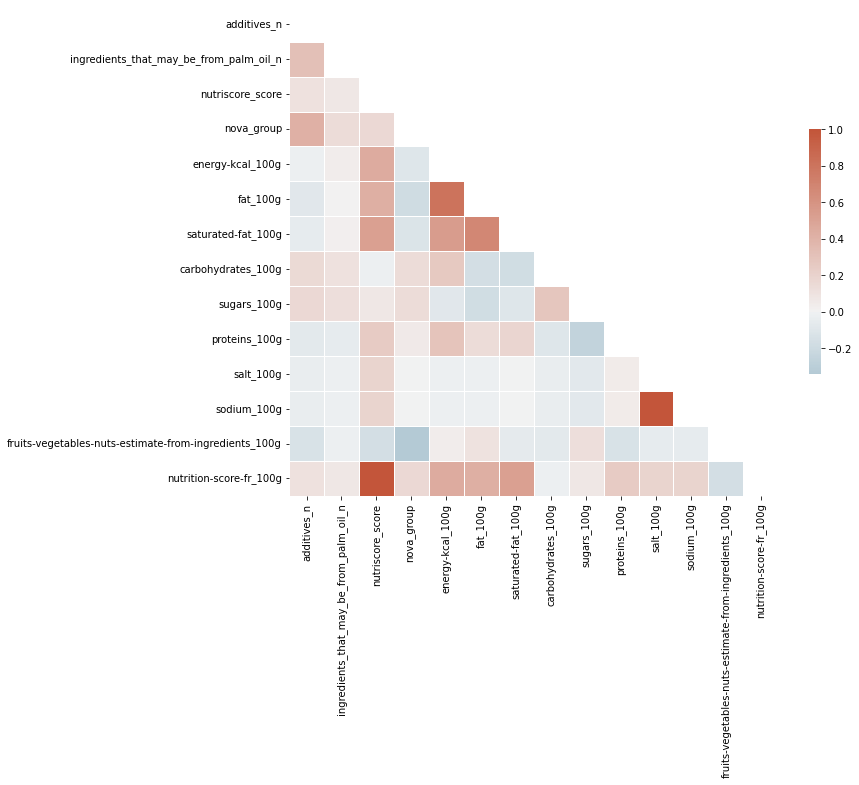

In [130]:
# Compute the correlation matrix
corr = df2[['additives_n','ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'food_groups_en', 'main_category_en', 'energy-kcal_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'nutrition-score-fr_100g']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

On voit qu'il y a une forte correlation entre "salt" et "sodium", en plus il existe aussi une forte correlation entre "nutrition-score-fr_100g" et "nutriscore_score" donc on va que garder un de deux valeurs

In [131]:
df2[['salt_100g', 'sodium_100g']].isna().mean(axis=0)

salt_100g      0.330500
sodium_100g    0.330502
dtype: float64

In [132]:
df2[['nutrition-score-fr_100g', 'nutriscore_score']].isna().mean(axis=0)

nutrition-score-fr_100g    0.718613
nutriscore_score           0.718616
dtype: float64

On garde 'salt_100g' et 'nutrition-score-fr_100g' qui ont un mieux taux remplissage.

In [133]:
# Supprimer les colonnes supplèmentaire 
cols_to_remove2 = ['sodium_100g', 'nutriscore_score']
df2 = df2.drop(cols_to_remove2, axis=1)
df2.shape

(1688990, 23)

## III. Traitement des valeurs manquantes


Tout d'abord, on crée une copie de notre dataset. Ensuite, on décide d'enlever toutes les lignes où le nom du produit ne figure pas. Il y a trois familles de variables : nutritionnelles, catégorielles, qualité du produit. On va classer les variables dans chacuns des groupes et après selon le classement on va choisir une stratégie pour remplacer des valeurs manquantes.

In [134]:
# Affichage du pourcentage de donneés manquantes
df2.isnull().mean() * 100

code                                                      0.000000
product_name                                              4.921284
brands                                                   52.460761
categories                                               59.780934
countries_en                                              0.337302
additives_n                                              70.855896
ingredients_that_may_be_from_palm_oil_n                  70.855896
nutriscore_grade                                         71.861586
nova_group                                               74.430340
pnns_groups_1                                             0.018117
pnns_groups_2                                             0.018058
food_groups_en                                           67.467599
main_category_en                                         59.781645
energy-kcal_100g                                         28.770449
fat_100g                                                 27.32

In [143]:
# On crée une copie
df_clean = df2.copy()

# Supprimer les lignes sans product name
df_clean.dropna(subset=['product_name'], inplace=True) 

In [144]:
df_clean.shape

(1605870, 23)

In [145]:
nutris = ['energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g']
filtre_sum_nan = df_clean[nutris].isna().sum(axis=1) < 4
df_clean = df_clean[filtre_sum_nan]
df_clean.shape

(1220430, 23)

<AxesSubplot:>

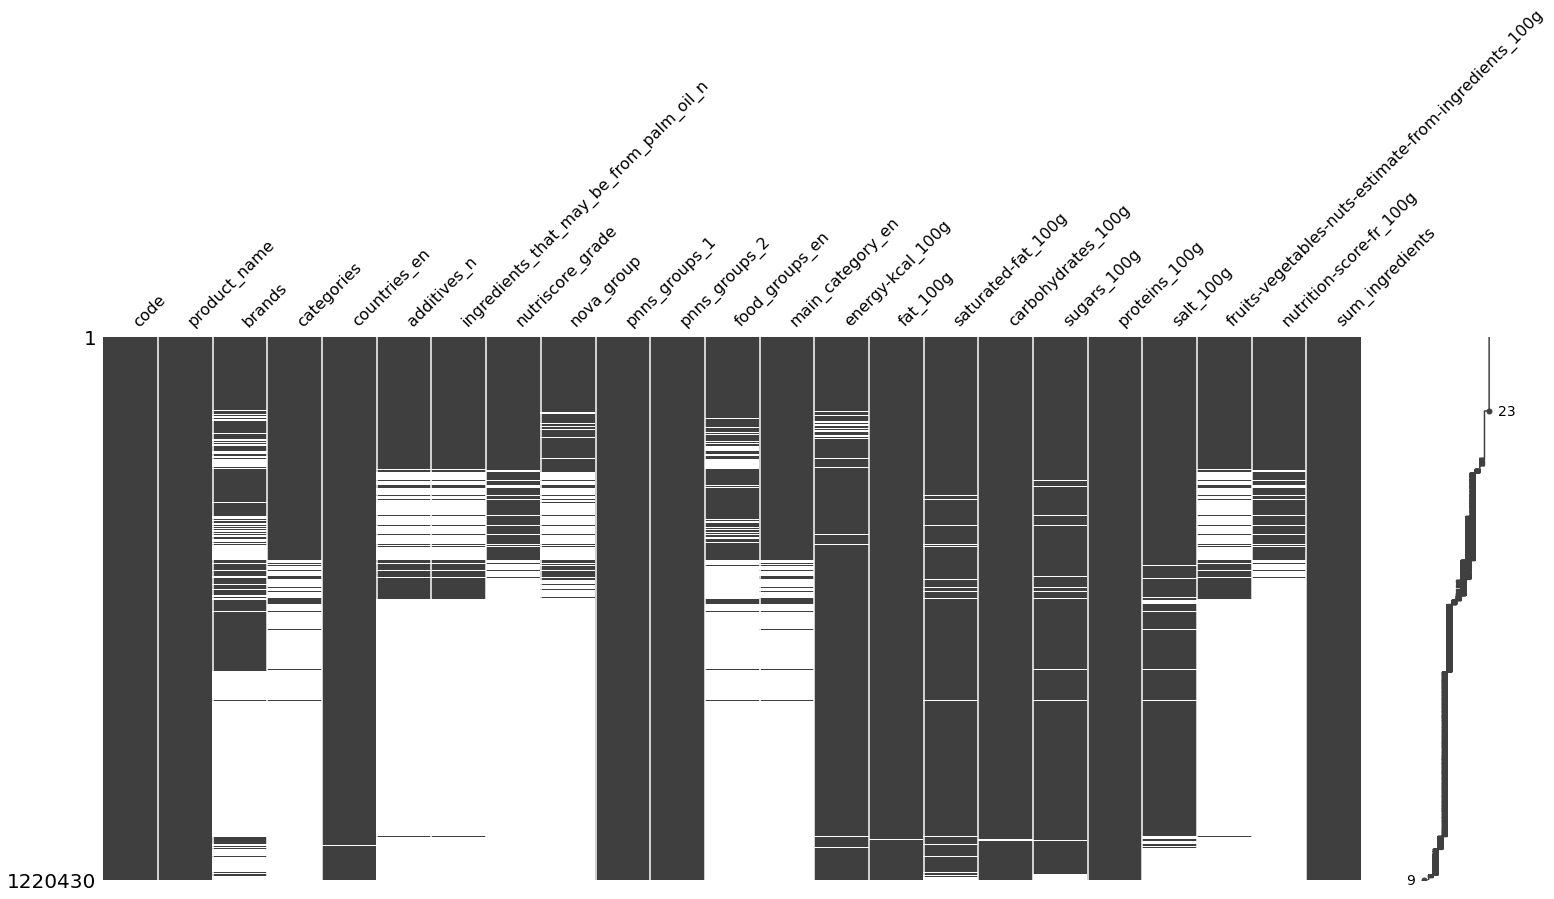

In [146]:
%matplotlib inline
msno.matrix(df_clean)

### A. Stratégie 1:  fillna pour les variables catégorielles: 
on utilise une stratégie fillna pour les remplacer(en utilisant le mode)

In [147]:
df_clean.isnull().mean() * 100

code                                                      0.000000
product_name                                              0.000000
brands                                                   49.487967
categories                                               55.113526
countries_en                                              0.151094
additives_n                                              65.865474
ingredients_that_may_be_from_palm_oil_n                  65.865474
nutriscore_grade                                         61.377056
nova_group                                               69.403817
pnns_groups_1                                             0.000000
pnns_groups_2                                             0.000000
food_groups_en                                           63.124063
main_category_en                                         55.113771
energy-kcal_100g                                          2.831953
fat_100g                                                  0.33

On transfère des variables catégorielles en catégorie et on remplace les valeurs manquantes des catégories par une valeur unknown au lieu de laisser un NaN.


In [148]:

col_cat = ['brands', 'categories', 'pnns_groups_1', 'pnns_groups_2', 'food_groups_en', 'main_category_en']

for col in col_cat:
    df_clean[col].fillna("unknown", inplace=True)
    #df_clean[col] = df_clean[col].astype("category")

In [149]:
"""# faire une imputation par rapport à la valeur médiane
col_cat = ['brands', 'categories', 'pnns_groups_1', 'pnns_groups_2', 'food_groups_en', 'main_category_en' ]
for col in col_cat :
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
"""    

"# faire une imputation par rapport à la valeur médiane\ncol_cat = ['brands', 'categories', 'pnns_groups_1', 'pnns_groups_2', 'food_groups_en', 'main_category_en' ]\nfor col in col_cat :\n    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)\n"

D'abord on a décidé que en ramplacant le mode pour les  valeurs manquantes des catégories , mais dans les étapes des analyses des univarié et bivarié on voit que c'est pas bonne manière parceque l'analyse va concentrer sur le mode des données donc on va pas utilser le mode pour les valeurs manquantes. 

In [150]:
df_clean.isnull().mean() * 100

code                                                      0.000000
product_name                                              0.000000
brands                                                    0.000000
categories                                                0.000000
countries_en                                              0.151094
additives_n                                              65.865474
ingredients_that_may_be_from_palm_oil_n                  65.865474
nutriscore_grade                                         61.377056
nova_group                                               69.403817
pnns_groups_1                                             0.000000
pnns_groups_2                                             0.000000
food_groups_en                                            0.000000
main_category_en                                          0.000000
energy-kcal_100g                                          2.831953
fat_100g                                                  0.33

### B. Stratégie 2: IterativeImputer pour les variables numériques et les variables nutritionnelles:

In [151]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

col_num = ['additives_n', 'ingredients_that_may_be_from_palm_oil_n', 'nova_group', 'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g']

# Utiliser max value et min value
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(df_clean[col_num ])
df_clean.loc[:,col_num ] = imp_mean.transform(df_clean[col_num ])

In [152]:
df_clean.shape

(1220430, 23)

On a enlevé 83120  lignes et on sauvgarde le df en format csv.

In [153]:
# Supprimer les lignes sans nom de pays
df_clean.dropna(subset=['countries_en'], inplace=True)

In [154]:
df_clean.shape

(1218586, 23)

On a supprimé 2206 lignes avec des valeurs manquantes. 

In [157]:
df_clean.to_csv("openfoodfacts_clean_data.csv", index=False)